In [3]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import streamlit as st
!pip install streamlit

In [6]:
# Load datasets
train_data = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

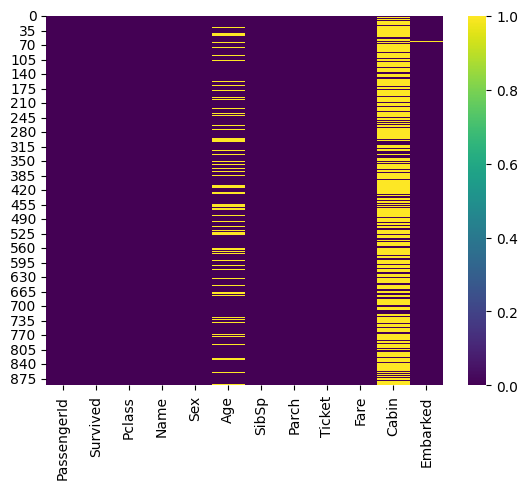

In [7]:
# Data Exploration
print(train_data.info())
print(train_data.describe())
sns.heatmap(train_data.isnull(), cmap='viridis')
plt.show()

In [8]:
# Data Preprocessing
train_data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [9]:
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
train_data.dropna(subset=['Embarked'], inplace=True)

<ipython-input-9-c48fd7d0c5e7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-9-c48fd7d0c5e7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [10]:
# Encode categorical variables
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

In [11]:
# Splitting the dataset
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [13]:
# Model Building
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Model Evaluation
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:,1]

In [15]:
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')
print(f'Precision: {precision_score(y_val, y_pred)}')
print(f'Recall: {recall_score(y_val, y_pred)}')
print(f'F1 Score: {f1_score(y_val, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_val, y_prob)}')

Accuracy: 0.7696629213483146
Precision: 0.6794871794871795
Recall: 0.7681159420289855
F1 Score: 0.7210884353741497
ROC-AUC: 0.8519478792713734


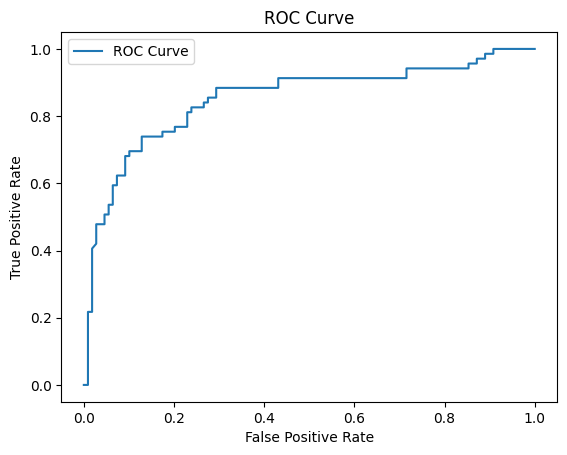

In [16]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [17]:
# Streamlit Deployment
def predict_survival(input_data):
    input_df = pd.DataFrame([input_data])
    input_df = scaler.transform(input_df)
    prediction = model.predict(input_df)
    return "Survived" if prediction[0] == 1 else "Not Survived"


In [18]:
st.title("Titanic Survival Prediction")
sex = st.selectbox("Sex", ['male', 'female'])
age = st.slider("Age", 1, 100, 25)
fare = st.slider("Fare", 0, 500, 50)
embarked = st.selectbox("Embarked", ['C', 'Q', 'S'])
sex = 1 if sex == 'male' else 0
embarked = {'C': 0, 'Q': 1, 'S': 2}[embarked]

2025-02-21 13:07:24.152 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 13:07:24.223 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-21 13:07:24.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 13:07:24.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 13:07:24.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 13:07:24.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 13:07:24.231 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 13:07:24.234 Session state does not 

In [19]:
input_data = {'Sex': sex, 'Age': age, 'Fare': fare, 'Embarked': embarked}
if st.button("Predict"):
    result = predict_survival(input_data)
    st.write(f'Prediction: {result}')

2025-02-21 13:07:34.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 13:07:34.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 13:07:34.557 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 13:07:34.558 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 13:07:34.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [20]:
# Interview Questions and Answers
print("1. What is the difference between precision and recall?")
print("Precision measures how many of the predicted positive instances were actually positive, whereas recall measures how many of the actual positive instances were correctly identified.")

print("2. What is cross-validation, and why is it important in binary classification?")
print("Cross-validation is a technique used to assess how well a model generalizes by splitting the dataset into training and validation sets multiple times. It helps in detecting overfitting and ensuring the model performs well on unseen data.")

1. What is the difference between precision and recall?
Precision measures how many of the predicted positive instances were actually positive, whereas recall measures how many of the actual positive instances were correctly identified.
2. What is cross-validation, and why is it important in binary classification?
Cross-validation is a technique used to assess how well a model generalizes by splitting the dataset into training and validation sets multiple times. It helps in detecting overfitting and ensuring the model performs well on unseen data.
